In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
df = pd.read_csv('/content/Student_Marks.csv')
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [ ]:
print(df.isnull().sum())

number_courses    0
time_study        0
Marks             0
dtype: int64


In [ ]:
duplicate_rows = df[df.duplicated()]
number_of_duplicates = len(duplicate_rows)
print(number_of_duplicates)

0


In [ ]:
columns = ['number_courses',	'time_study',	'Marks']
for col in columns:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col + '_outlier'] = df[col].apply(lambda x: x < lower_bound or x > upper_bound)
        print(f"Number of outliers in {col}: {df[col + '_outlier'].sum()}")

Number of outliers in number_courses: 0
Number of outliers in time_study: 0
Number of outliers in Marks: 0


                number_courses  time_study     Marks
number_courses        1.000000    0.204844  0.417335
time_study            0.204844    1.000000  0.942254
Marks                 0.417335    0.942254  1.000000


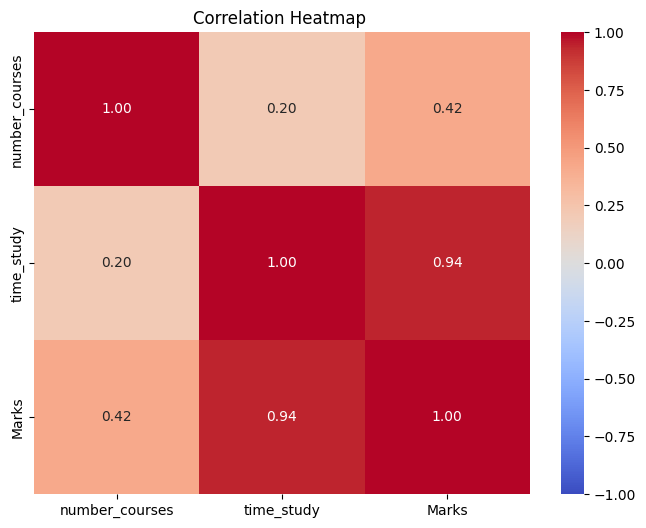

In [ ]:
correlation = df[['number_courses',	'time_study',	'Marks']].corr()
print(correlation)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap ')
plt.show()


In [ ]:
print(df['number_courses'].value_counts())
print(df['time_study'].value_counts())
print(df['Marks'].value_counts())


number_courses
3    22
4    21
6    16
8    16
7    15
5    10
Name: count, dtype: int64
time_study
4.508    1
4.869    1
1.629    1
4.633    1
2.518    1
        ..
3.864    1
1.299    1
0.156    1
4.378    1
6.335    1
Name: count, Length: 100, dtype: int64
Marks
19.202    1
21.379    1
7.014     1
20.398    1
13.416    1
         ..
24.172    1
8.837     1
9.333     1
26.532    1
32.357    1
Name: count, Length: 100, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['time_study','number_courses','Marks']] = scaler.fit_transform(df[['time_study','number_courses','Marks']])
print('Data after normalizing:\n',df[['time_study','number_courses','Marks']].head(10))

Data after normalizing:
    time_study  number_courses     Marks
0    0.561252             0.0  0.273556
1    0.000000             0.2  0.042765
2    0.386338             0.2  0.165063
3    0.993894             0.6  0.954095
4    0.981427             1.0  1.000000
5    0.396260             0.6  0.245784
6    0.759064             0.0  0.488630
7    0.421956             0.4  0.234554
8    0.548785             0.2  0.296619
9    0.773057             0.0  0.508211


In [ ]:
df=df.copy()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['time_study','number_courses']]
y = df['Marks']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(f'Intercept: {model.intercept_}')
print(f"Coefficient: {model.coef_[0]}")

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')


Intercept: -0.12298429043800535
Coefficient: 0.8178780829825378
Mean Squared Error: 0.005751386564651984
R^2 Score: 0.9459936100591211


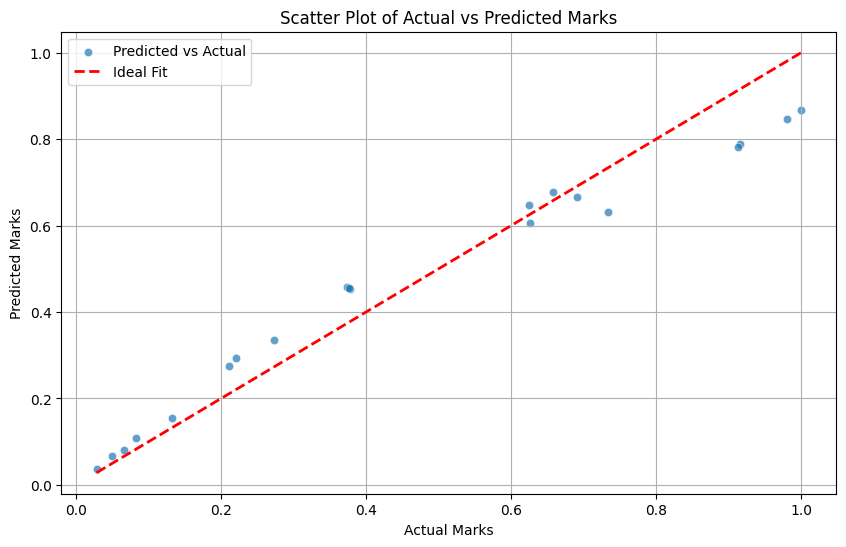

In [ ]:
df=df.copy()

plt.figure(figsize=(10, 6))


sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, label='Predicted vs Actual')


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')

plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Scatter Plot of Actual vs Predicted Marks')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print(f'Decision Tree Mean Squared Error: {mean_squared_error(y_test, y_pred_dt)}')
print(f'Decision Tree R^2 Score: {r2_score(y_test, y_pred_dt)}')

# Calculate residuals
residuals = y_test - y_pred_dt

Decision Tree Mean Squared Error: 0.0012027030661139497
Decision Tree R^2 Score: 0.988706436258198


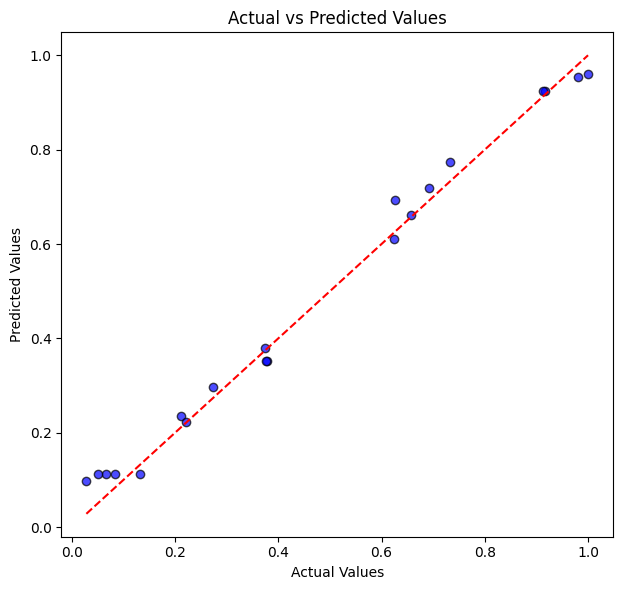

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()